In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('outliers_treated.csv')

In [5]:
df.drop(columns=['Unnamed: 0','price_per_sqft','areaWithType','outliers','area_room_ratio','store room','pooja room','others'],inplace=True)

In [6]:
df.head()

,property_type,society,sector,price,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,1081.0,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,1105.0,2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,38
2,flat,breez global hill view,sohna road,0.32,585.0,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,1995.0,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,532.0,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,0,159


In [7]:
df['luxury_cat'] = pd.cut(df['luxury_score'],bins=[-1,50,150,175],labels=['low','medium','high'])
df['floorNum_cat'] = pd.cut(df['floorNum'],bins=[-1,3,10,51],labels=['low','medium','high'])

In [8]:
df.drop(columns=['luxury_score','facing','floorNum','society'],inplace=True)

In [9]:
df.loc[df['agePossession'] == 'Undefined','agePossession'] = np.nan

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   property_type        3649 non-null   object  
 1   sector               3649 non-null   object  
 2   price                3649 non-null   float64 
 3   area                 3649 non-null   float64 
 4   bedRoom              3649 non-null   int64   
 5   bathroom             3649 non-null   int64   
 6   balcony              3649 non-null   object  
 7   agePossession        3334 non-null   object  
 8   super_built_up_area  1914 non-null   float64 
 9   built_up_area        1607 non-null   float64 
 10  carpet_area          1897 non-null   float64 
 11  study room           3649 non-null   int64   
 12  servant room         3649 non-null   int64   
 13  furnishing_type      3649 non-null   int64   
 14  luxury_cat           3649 non-null   category
 15  floorNum_cat         

0 = Unfurnished  
1 = Semi furnished  
2 = furnished  

In [11]:
df['furnishing_type'] = df['furnishing_type'].replace({0:'unfurnished',1:'semi_furnished',2:'furnished'})

In [12]:
df['furnishing_type'].value_counts()

furnishing_type
unfurnished       2430
semi_furnished    1026
furnished          193
Name: count, dtype: int64

In [13]:
x = df.drop(columns=['price'])
y = df['price']

np.float64(3.3035665005156436)

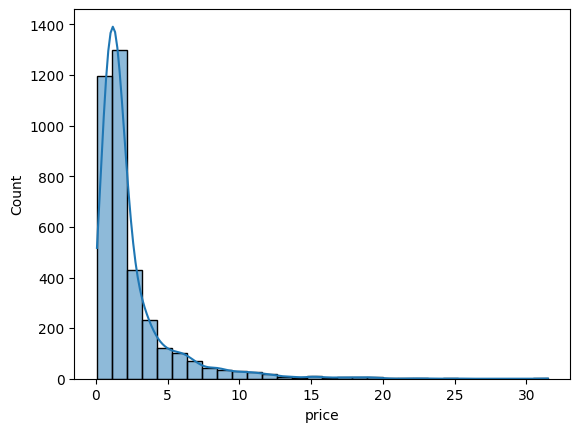

In [14]:
sns.histplot(df['price'], bins=30, kde=True)
df['price'].skew()

<Axes: xlabel='price', ylabel='Count'>

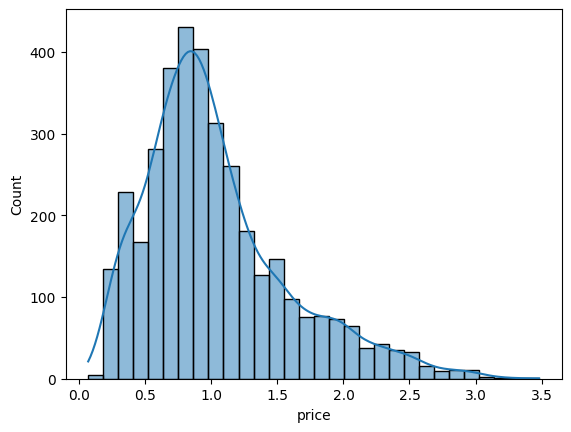

In [15]:
y = np.log1p(y)
sns.histplot(y, bins=30, kde=True)

In [16]:
cat_cols = ['property_type', 'sector', 'balcony', 'agePossession','furnishing_type', 'luxury_cat', 'floorNum_cat']

In [17]:
num_cols =['area', 'bedRoom', 'bathroom', 'super_built_up_area',
       'built_up_area', 'carpet_area', 'study room', 'servant room']

In [18]:
x.isnull().sum()

property_type             0
sector                    0
area                      0
bedRoom                   0
bathroom                  0
balcony                   0
agePossession           315
super_built_up_area    1735
built_up_area          2042
carpet_area            1752
study room                0
servant room              0
furnishing_type           0
luxury_cat                0
floorNum_cat             17
dtype: int64

# Ordinal Encoding

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

In [20]:

missing_pipe_cat = Pipeline([
    ('Missing_Cat', SimpleImputer(strategy='most_frequent')),
   ('ordinal',OrdinalEncoder())
])

missing_pipe_num = Pipeline([
    ('Missing_Num', SimpleImputer(strategy='median')),
    ('scaling',StandardScaler())
])


Ordinal_preprocessor = ColumnTransformer([
    ('missing_pipe_cat',missing_pipe_cat,['agePossession','floorNum_cat']),
    ('missing_pipe_num',missing_pipe_num,[ 'super_built_up_area','built_up_area', 'carpet_area']),
    ('ordinal',OrdinalEncoder(),['property_type','sector','balcony','furnishing_type','luxury_cat']),
    ('scaling',StandardScaler(),['area', 'bedRoom', 'bathroom', 'study room', 'servant room'])
],remainder='passthrough')


model_pipe = Pipeline([

    ('preprocessor',Ordinal_preprocessor),
    ('model',LinearRegression())    

])




In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model_pipe, x, y, cv=kfold, scoring='r2')
score.mean()

np.float64(0.7227998739158495)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_pipe.fit(x_train, y_train)
y_pred = model_pipe.predict(x_test)

y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse, mae

(2.8633441551688064, 0.8592283494689955)

In [23]:
def scorer1(model_name,model):

    output = []

    output.append(model_name)

    model_pipe = Pipeline([
        ('preprocessor',Ordinal_preprocessor),
        ('regressor',model)
    ])


    kfold = KFold(n_splits=10,shuffle=True, random_state=0)
    score = cross_val_score(model_pipe,x,y,cv=kfold,scoring='r2')

    output.append(score.mean())

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

    model_pipe.fit(x_train,y_train)
    y_pred = model_pipe.predict(x_test)

    y_pred = np.expm1(y_pred)
    y_test = np.expm1(y_test)

    mse =mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    output.append(mse)
    output.append(mae)

    return output

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


model_dict = {
    'linear_reg': LinearRegression(),
    'svr': SVR(),
    'ridge': Ridge(),
    'lasso': Lasso(), 
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'extra_trees': ExtraTreesRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'mlp': MLPRegressor(),
    'xgboost': XGBRegressor(),
    'lightgbm':LGBMRegressor()
}

In [25]:
model_output = []

for model_name,model in model_dict.items():
    model_output.append(scorer1(model_name=model_name, model=model))

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 15
[LightGBM] [Info] Start training from score 1.034527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1168
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 15
[LightGBM] [Info] Start training from score 1.034588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1168
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 15
[LightGBM] [Info] Start training from score 1.034913
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 15
[LightGBM] [Info] Start training from score 1.035330
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 15
[LightGBM] [Info] Start training from score 1.029744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 15
[LightGBM] [Info] Start training from score 1.033340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 3285, number of used features: 15
[LightGBM] [Info] Start training from score 1.033572
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1168
[LightGBM] [Info] Number of data points in the train set: 2919, number of used features: 15
[LightGBM] [Info] Start training from score 1.035228


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [26]:
model_output = pd.DataFrame(model_output, columns=['model_name','r2_score','mse','mae']).sort_values(by='mse', ascending=True)

In [27]:
model_output

,model_name,r2_score,mse,mae
10,xgboost,0.896189,1.053062,0.465643
11,lightgbm,0.890643,1.148702,0.497829
5,random_forest,0.886646,1.253480,0.495775
6,extra_trees,0.882616,1.260250,0.510840
7,gradient_boosting,0.868465,1.263679,0.566611
9,mlp,0.802174,1.916060,0.802672
4,decision_tree,0.794030,2.262457,0.690122
8,adaboost,0.724097,2.319923,0.885448
1,svr,0.757169,2.609702,0.826330
0,linear_reg,0.724689,2.618305,0.863220


# One Hot Encoding

In [28]:
missing_pipe_cat_age = Pipeline([
    ('Missing_Cat', SimpleImputer(strategy='most_frequent')),
   ('Onehot',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

missing_pipe_cat_floor = Pipeline([
    ('Missing_Cat', SimpleImputer(strategy='most_frequent')),
   ('ordinal',OrdinalEncoder())
])

missing_pipe_num = Pipeline([
    ('Missing_Num', SimpleImputer(strategy='median')),
    ('scaling',StandardScaler())
])


Onehot_preprocessor = ColumnTransformer([
    ('missing_pipe_cat_age',missing_pipe_cat_age,['agePossession']),
    ('missing_pipe_cat_floor',missing_pipe_cat_floor,['floorNum_cat']),
    ('missing_pipe_num',missing_pipe_num,[ 'super_built_up_area','built_up_area', 'carpet_area']),
    ('ordinal',OrdinalEncoder(),['balcony','luxury_cat']),
    ('onehot',OneHotEncoder(drop='first', handle_unknown='ignore'), ['sector','furnishing_type','property_type']),
    ('scaling',StandardScaler(),['area', 'bedRoom', 'bathroom', 'study room', 'servant room'])
],remainder='passthrough')


model_pipe = Pipeline([

    ('preprocessor',Onehot_preprocessor),
    ('model',LinearRegression())    

])

In [29]:
kfold = KFold(n_splits=10,shuffle=True,random_state=0)
score = cross_val_score(model_pipe,x,y,cv=kfold,scoring='r2')
score.mean()

np.float64(0.8490091772686654)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model_pipe.fit(x_train, y_train)
y_pred = model_pipe.predict(x_test)

y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse, mae

(1.4371413448631003, 0.6066978539662372)

In [31]:
def scorer2(model_name,model):

    output = []

    output.append(model_name)

    model_pipe = Pipeline([
        ('preprocessor',Onehot_preprocessor),
        ('regressor',model)
    ])

    kfold = KFold(n_splits=10,shuffle=True, random_state=0)
    score = cross_val_score(model_pipe,x,y,cv=kfold,scoring='r2')

    output.append(score.mean())

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

    model_pipe.fit(x_train,y_train)
    y_pred = model_pipe.predict(x_test)

    y_pred = np.expm1(y_pred)
    y_test = np.expm1(y_test)

    mse =mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    output.append(mse)
    output.append(mae)

    return output

In [32]:
model_output_OHE = []

for model_name,model in model_dict.items():
    model_output_OHE.append(scorer2(model_name,model))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 77
[LightGBM] [Info] Start training from score 1.034527
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 76
[LightGBM] [Info] Start training from score 1.034588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 77
[LightGBM] [Info] Start training from score 1.034913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 76
[LightGBM] [Info] Start training from score 1.035330
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 75
[LightGBM] [Info] Start training from score 1.029744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 76
[LightGBM] [Info] Start training from score 1.033340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 3285, number of used features: 76
[LightGBM] [Info] Start training from score 1.033572
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1173
[LightGBM] [Info] Number of data points in the train set: 2919, number of used features: 69
[LightGBM] [Info] Start training from score 1.035228


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [33]:
model_output_OHE = pd.DataFrame(model_output,columns=['model_name','r2_score','mse','mae']).sort_values(by='mse',ascending=True)

In [34]:
model_output_OHE

,model_name,r2_score,mse,mae
10,xgboost,0.896189,1.053062,0.465643
11,lightgbm,0.890643,1.148702,0.497829
5,random_forest,0.886646,1.253480,0.495775
6,extra_trees,0.882616,1.260250,0.510840
7,gradient_boosting,0.868465,1.263679,0.566611
9,mlp,0.802174,1.916060,0.802672
4,decision_tree,0.794030,2.262457,0.690122
8,adaboost,0.724097,2.319923,0.885448
1,svr,0.757169,2.609702,0.826330
0,linear_reg,0.724689,2.618305,0.863220


# Target Encoding

In [35]:
import category_encoders as ce


In [36]:
missing_pipe_cat_age = Pipeline([
    ('Missing_Cat', SimpleImputer(strategy='most_frequent')),
   ('Onehot',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

missing_pipe_cat_floor = Pipeline([
    ('Missing_Cat', SimpleImputer(strategy='most_frequent')),
   ('ordinal',OrdinalEncoder())
])

missing_pipe_num = Pipeline([
    ('Missing_Num', SimpleImputer(strategy='median')),
    ('scaling',StandardScaler())
])


Target_preprocessor = ColumnTransformer([
    ('missing_pipe_cat_age',missing_pipe_cat_age,['agePossession']),
    ('missing_pipe_cat_floor',missing_pipe_cat_floor,['floorNum_cat']),
    ('missing_pipe_num',missing_pipe_num,[ 'super_built_up_area','built_up_area', 'carpet_area']),
    ('ordinal',OrdinalEncoder(),['balcony','luxury_cat']),
    ('onehot',OneHotEncoder(drop='first', handle_unknown='ignore'), ['furnishing_type','property_type']),
    ('target',ce.TargetEncoder(),['sector']),
    ('scaling',StandardScaler(),['area', 'bedRoom', 'bathroom', 'study room', 'servant room'])
],remainder='passthrough')


model_pipe = Pipeline([

    ('preprocessor',Target_preprocessor),
    ('model',LinearRegression())    

])

In [37]:
kfold =KFold(n_splits=10,shuffle=True, random_state=0)
score = cross_val_score(model_pipe,x,y,cv=kfold,scoring='r2')
score.mean()

np.float64(0.8211235640630894)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

model_pipe.fit(x_train,y_train)
y_pred = model_pipe.predict(x_test)

y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

mse =mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(mse)
print(mae)

1.7043095305448301
0.6810544920523884


In [39]:
def scorer3(model_name,model):

    output = []
    output.append(model_name)

    model_pipe =Pipeline([
        ('preprocessor',Target_preprocessor),
        ('regressor',model)
    ])

    kfold = KFold(n_splits=10,shuffle=True,random_state=0)
    score = cross_val_score(model_pipe,x,y,cv=kfold,scoring='r2')

    output.append(score.mean())

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

    model_pipe.fit(x_train,y_train)
    y_pred = model_pipe.predict(x_test)

    y_pred = np.expm1(y_pred)
    y_test = np.expm1(y_test)

    mse =mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    output.append(mse)
    output.append(mae)

    return output

In [40]:
model_output_target = []

for model_name,model in model_dict.items():
    model_output_target.append(scorer3(model_name,model))

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 19
[LightGBM] [Info] Start training from score 1.034527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1173
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 19
[LightGBM] [Info] Start training from score 1.034588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1173
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 19
[LightGBM] [Info] Start training from score 1.034913
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 19
[LightGBM] [Info] Start training from score 1.035330
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 19
[LightGBM] [Info] Start training from score 1.029744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 19
[LightGBM] [Info] Start training from score 1.033340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1174
[LightGBM] [Info] Number of data points in the train set: 3285, number of used features: 19
[LightGBM] [Info] Start training from score 1.033572
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1173
[LightGBM] [Info] Number of data points in the train set: 2919, number of used features: 19
[LightGBM] [Info] Start training from score 1.035228


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [41]:
model_output_target = pd.DataFrame(model_output_target, columns=['model_name','r2_score','mse','mae']).sort_values(by='mse', ascending=True)
model_output_target

,model_name,r2_score,mse,mae
6,extra_trees,0.902844,0.967116,0.427664
11,lightgbm,0.896364,1.018493,0.482876
5,random_forest,0.897711,1.108591,0.470469
10,xgboost,0.898327,1.155449,0.473557
7,gradient_boosting,0.877633,1.255492,0.537839
9,mlp,0.852163,1.380693,0.613046
1,svr,0.859649,1.547026,0.592187
4,decision_tree,0.815330,1.692704,0.564178
0,linear_reg,0.821124,1.704310,0.681054
2,ridge,0.821145,1.707042,0.681398


In [42]:
model_output.head(1)

,model_name,r2_score,mse,mae
10,xgboost,0.896189,1.053062,0.465643


In [43]:
model_output_OHE.head(1)

,model_name,r2_score,mse,mae
10,xgboost,0.896189,1.053062,0.465643


In [44]:
model_output_target.head(1)

,model_name,r2_score,mse,mae
6,extra_trees,0.902844,0.967116,0.427664
